Importing the Dependencies

# New Section

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

Data Collection and Processing

In [ ]:

loan_dataset = pd.read_csv('/content/loan.csv')

In [ ]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [ ]:

loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:

loan_dataset.shape

(614, 13)

In [ ]:

loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:

loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:

loan_dataset = loan_dataset.dropna()

In [ ]:

loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:

loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

<ipython-input-10-aba768875743>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [ ]:

loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:

loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:

loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [ ]:

loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

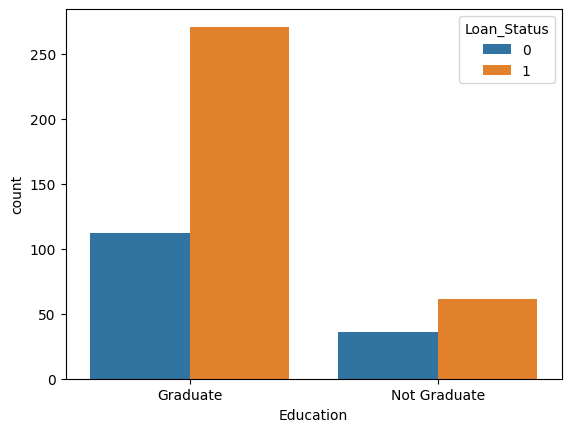

In [ ]:

sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

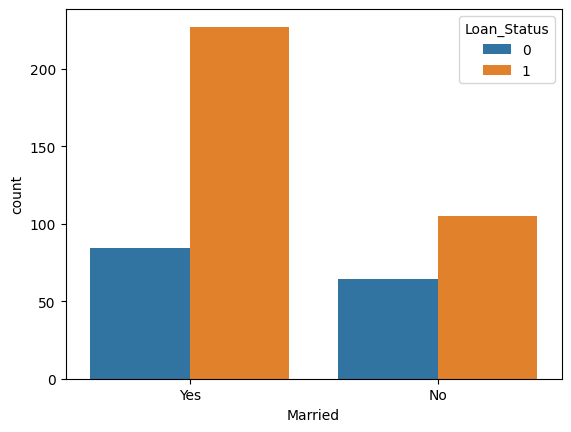

In [ ]:

sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [ ]:

loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:

X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [ ]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
np.random.seed = 0
models = {
    "KNeighborsClassifier":KNeighborsClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "SVC": svm.SVC(kernel="linear")
}
scores = pd.DataFrame(columns=["KNeighborsClassifier","DecisionTreeClassifier","SVC"],index=["accuracy","precision","recall","f1 score","cross val accuracy","cross val precision","cross val recall","cross val f1score"])


for model, inst in models.items():
  inst.fit(X_train, Y_train)
  pred = inst.predict(X_test)
  pre,recall,f1score,_=precision_recall_fscore_support(Y_test,pred,average="weighted")
  cross_acc=np.mean(cross_val_score(inst,X_train,Y_train,scoring="accuracy"))
  cross_pre=np.mean(cross_val_score(inst,X_train,Y_train,scoring="precision"))
  cross_rec=np.mean(cross_val_score(inst,X_train,Y_train,scoring="recall"))
  cross_f1=np.mean(cross_val_score(inst,X_train,Y_train,scoring="f1"))
  scores[model] = [accuracy_score(Y_test, pred),pre,recall,f1score,cross_acc,cross_pre,cross_rec,cross_f1]
  print(f"{model}:\n{scores[model]}\n")

KNeighborsClassifier:
accuracy               0.666667
precision              0.632479
recall                 0.666667
f1 score               0.638889
cross val accuracy     0.627159
cross val precision    0.694547
cross val recall       0.822712
cross val f1score      0.752520
Name: KNeighborsClassifier, dtype: float64

DecisionTreeClassifier:
accuracy               0.729167
precision              0.712171
recall                 0.729167
f1 score               0.711620
cross val accuracy     0.710532
cross val precision    0.783135
cross val recall       0.785819
cross val f1score      0.779391
Name: DecisionTreeClassifier, dtype: float64

SVC:
accuracy               0.833333
precision              0.831695
recall                 0.833333
f1 score               0.825275
cross val accuracy     0.768458
cross val precision    0.761696
cross val recall       0.970000
cross val f1score      0.853060
Name: SVC, dtype: float64



In [ ]:
scores

,KNeighborsClassifier,DecisionTreeClassifier,SVC
accuracy,0.666667,0.729167,0.833333
precision,0.632479,0.712171,0.831695
recall,0.666667,0.729167,0.833333
f1 score,0.638889,0.711620,0.825275
cross val accuracy,0.627159,0.710532,0.768458
cross val precision,0.694547,0.783135,0.761696
cross val recall,0.822712,0.785819,0.970000
cross val f1score,0.752520,0.779391,0.853060


In [ ]:
classifier = svm.SVC(kernel='linear', random_state=0)

In [ ]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear', random_state=0)

Model Evaluation

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7986111111111112


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy on test data : ', test_data_accuray*100)

Accuracy on test data :  83.33333333333334


In [ ]:
corr =loan_dataset.corr()
corr

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,-0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,-0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Education,-0.059245,-0.001652,1.000000,0.005085,0.131172,0.074499,0.172780,0.102168,0.056656,0.055005,0.068437
Self_Employed,-0.002761,0.015674,0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.032644,0.036717,0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,0.156171,0.102950,0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
LoanAmount,0.098975,0.183442,0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit_History,0.022447,0.029095,0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390
Property_Area,-0.000204,0.038653,0.055005,-0.050797,-0.053160,0.006540,-0.109685,-0.058656,-0.003013,1.000000,0.031361


<Axes: >

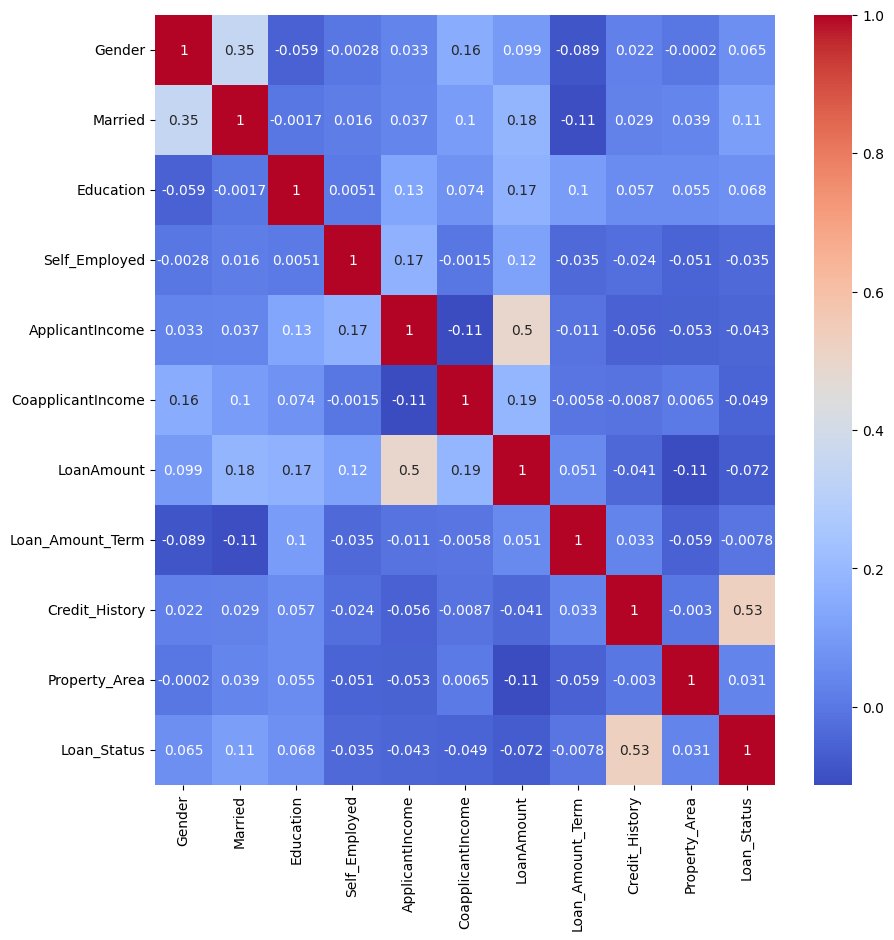

In [ ]:
corr =loan_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [ ]:
import pickle

In [ ]:
filename = 'LoanStatusApproval.pkl'
pickle.dump(classifier, open(filename, 'wb'))

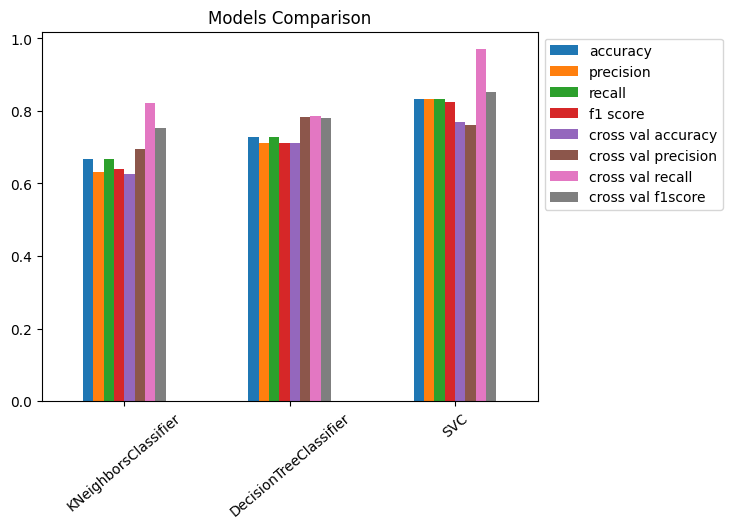

In [ ]:
scores.T.plot.bar()
plt.title("Models Comparison")
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.xticks(rotation=40);

In [ ]:
scores.to_csv("table11.csv")